<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/KMeans_Clustering_Exercise_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [41]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)
df['Target']= iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,species
0,0.222222,0.625000,1.4,0.2,0,setosa
1,0.166667,0.416667,1.4,0.2,0,setosa
2,0.111111,0.500000,1.3,0.2,0,setosa
3,0.083333,0.458333,1.5,0.2,0,setosa
4,0.194444,0.666667,1.4,0.2,0,setosa


In [42]:
df.columns =['SL','SW','PL','PW','Target','Species']
df.head()

,SL,SW,PL,PW,Target,Species
0,0.222222,0.625000,1.4,0.2,0,setosa
1,0.166667,0.416667,1.4,0.2,0,setosa
2,0.111111,0.500000,1.3,0.2,0,setosa
3,0.083333,0.458333,1.5,0.2,0,setosa
4,0.194444,0.666667,1.4,0.2,0,setosa


In [43]:
km = KMeans(n_clusters=3, random_state=123)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [44]:
scaler = MinMaxScaler()
scaler.fit(df[['SW']])
df['SW']= scaler.transform(df[['SW']])
scaler.fit(df[['SL']])
df['SL']= scaler.transform(df[['SL']])
ypred= km.fit_predict(df[['SL','SW']])
ypred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [45]:
df['cluster']=ypred
df.head()

,SL,SW,PL,PW,Target,Species,cluster
0,0.222222,0.625000,1.4,0.2,0,setosa,1
1,0.166667,0.416667,1.4,0.2,0,setosa,1
2,0.111111,0.500000,1.3,0.2,0,setosa,1
3,0.083333,0.458333,1.5,0.2,0,setosa,1
4,0.194444,0.666667,1.4,0.2,0,setosa,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


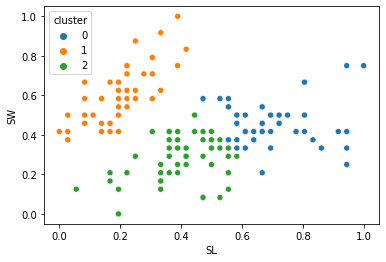

In [47]:
import seaborn as sns
sns.scatterplot(df.SL,df.SW, data=df, hue='cluster', palette='tab10')
plt.show()

In [36]:
k_rng = range(1,11)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['SL','SW']])
  sse.append(km.inertia_)

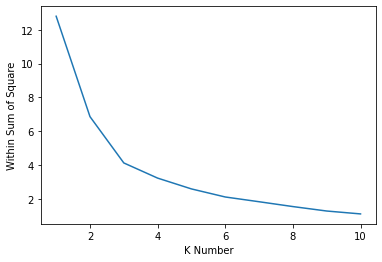

In [37]:
plt.xlabel('K Number')
plt.ylabel('Within Sum of Square')
plt.plot(k_rng,sse)